# Ball Detection Analysis Notebook

This notebook processes ball detection data from the tennis game rally, performs data interpolation, calculates rolling means, and identifies significant changes to infer ball hits.


##### Importing necessary libraries

In [40]:
import pickle  # For loading serialized data
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting data
import numpy as np # for math functions

##### Loading data from a pickle file containing ball detections

In [41]:
# Reading the pickle file containing ball positions.

with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

##### Preprocess Data

Extract ball positions and convert them into a pandas DataFrame. Then, interpolate missing values.

In [42]:
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

##### Calculate Rolling Mean of Midpoint Y Coordinate

Compute the mid-point on the Y-axis and its rolling mean to smooth out the data.



In [43]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

##### Plot Rolling Mean of Y Midpoint

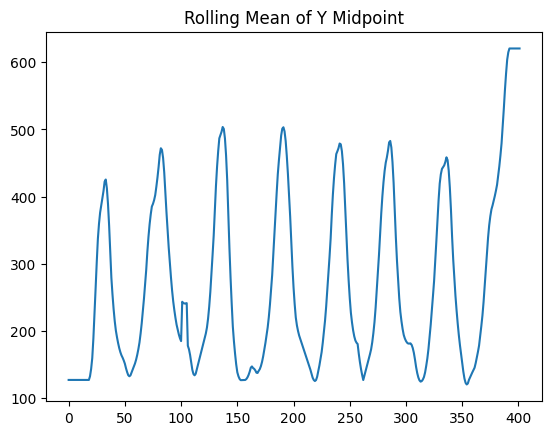

In [44]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])
plt.title('Rolling Mean of Y Midpoint')
plt.show()

##### Plot Delta of Y Midpoint Rolling Mean

Determine the difference between consecutive points of the rolling mean to detect changes.

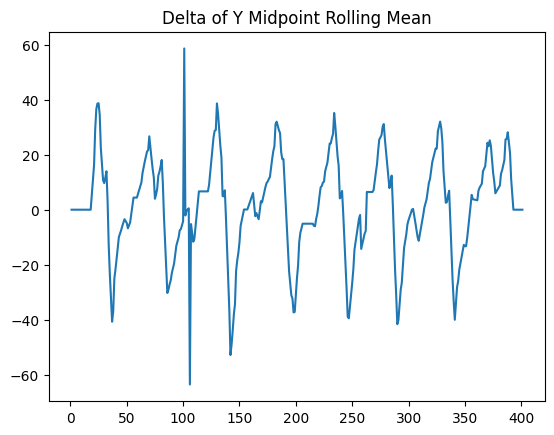

In [45]:

df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])
plt.title('Delta of Y Midpoint Rolling Mean')
plt.show()

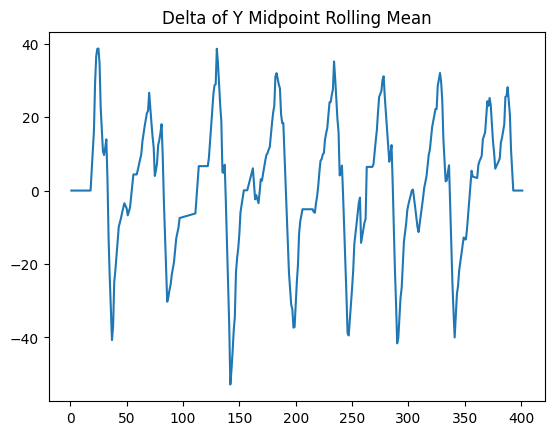

In [59]:
# Assuming df_ball_positions['mid_y_rolling_mean'] is already calculated
# Calculate delta_y as the difference of the rolling mean
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

# Set indices 98 to 109 to NaN
df_ball_positions.loc[98:110, 'delta_y'] = np.nan

# Interpolate the missing values linearly
df_ball_positions['delta_y'] = df_ball_positions['delta_y'].interpolate(method='linear')

plt.plot(df_ball_positions['delta_y'])
plt.title('Delta of Y Midpoint Rolling Mean')
plt.show()



##### Detect Ball Hits

Analyze delta changes to identify potential ball hits based on defined thresholds.

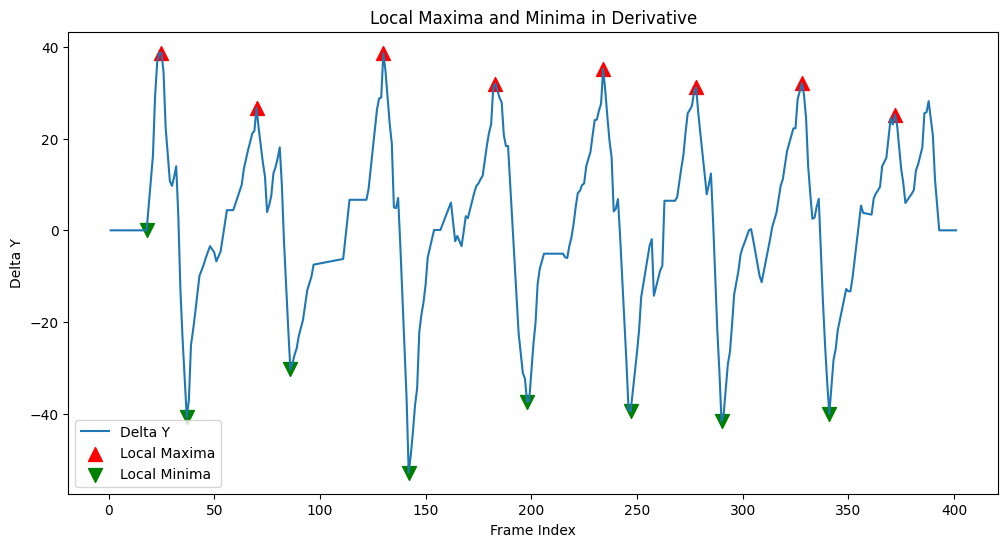

Local Maxima Indices: [25, 70, 130, 183, 234, 278, 328, 372]
Local Minima Indices: [37, 86, 142, 198, 247, 290, 341, 18]
[18, 25, 37, 70, 86, 130, 142, 183, 198, 234, 247, 278, 290, 328, 341, 372]


In [86]:
from scipy.signal import argrelextrema

# Set the order parameter to define how many points on each side to use for the comparison to find extrema
order = 15  # Adjust this number based on your data's sampling frequency and characteristics

# Find local maxima
local_maxima = argrelextrema(df_ball_positions['delta_y'].values[:375], np.greater, order=order)[0]

# Find local minima
local_minima = argrelextrema(df_ball_positions['delta_y'].values[:375], np.less, order=order)[0]

# %%
# Plotting to visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df_ball_positions['delta_y'], label='Delta Y')
plt.scatter(local_maxima, df_ball_positions['delta_y'].iloc[local_maxima], color='r', label='Local Maxima', marker='^', s=100)
plt.scatter(local_minima, df_ball_positions['delta_y'].iloc[local_minima], color='g', label='Local Minima', marker='v', s=100)
plt.title('Local Maxima and Minima in Derivative')
plt.xlabel('Frame Index')
plt.ylabel('Delta Y')
plt.legend()
plt.show()

# %%
# Print or use the indices of local maxima and minima
print("Local Maxima Indices:", local_maxima.tolist())
print("Local Minima Indices:", local_minima.tolist())

frame_nums_with_ball_hits = local_maxima.tolist() + local_minima.tolist()
frame_nums_with_ball_hits.sort() 
print(frame_nums_with_ball_hits)




##### Using the original rolling mean plot and getting max/mins of ball position

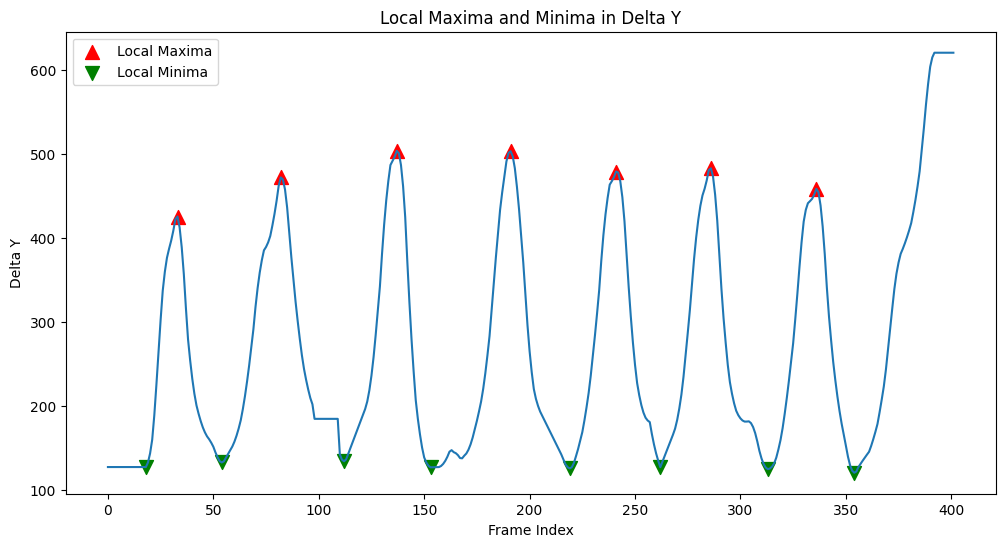

Local Maxima Indices: [33, 82, 137, 191, 241, 286, 336]
Local Minima Indices: [54, 112, 153, 219, 262, 313, 354, 18]
[18, 33, 54, 82, 112, 137, 153, 191, 219, 241, 262, 286, 313, 336, 354]
[126.76599121 126.76599121 126.76599121 126.76599121 126.76599121
 126.76599121 126.76599121 126.76599121 126.76599121 126.76599121
 126.76599121 126.76599121 126.76599121 126.76599121 126.76599121
 126.76599121 126.76599121 126.76599121 126.76599121 132.2170639
 143.11920929 159.39824066 188.55539398 225.12115326 263.73074341]


In [87]:
from scipy.signal import argrelextrema

# Set the order parameter to define how many points on each side to use for the comparison to find extrema
order = 15  # Adjust this number based on your data's sampling frequency and characteristics

# Find local maxima
local_maxima = argrelextrema(df_ball_positions['mid_y_rolling_mean'].values[:375], np.greater, order=order)[0]

# Find local minima
local_minima = argrelextrema(df_ball_positions['mid_y_rolling_mean'].values[:375], np.less, order=order)[0]
local_minima = np.append(local_minima, 18)

# %%
# Plotting to visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df_ball_positions['mid_y_rolling_mean'], label='')
plt.scatter(local_maxima, df_ball_positions['mid_y_rolling_mean'].iloc[local_maxima], color='r', label='Local Maxima', marker='^', s=100)
plt.scatter(local_minima, df_ball_positions['mid_y_rolling_mean'].iloc[local_minima], color='g', label='Local Minima', marker='v', s=100)
plt.title('Local Maxima and Minima in Delta Y')
plt.xlabel('Frame Index')
plt.ylabel('Delta Y')
plt.legend()
plt.show()

# %%
# Print or use the indices of local maxima and minima
print("Local Maxima Indices:", local_maxima.tolist())
print("Local Minima Indices:", local_minima.tolist())

frame_nums_with_ball_hits = local_maxima.tolist() + local_minima.tolist()
frame_nums_with_ball_hits.sort()




In [88]:
# Accessing DataFrame rows at these indices
print("Data at Local Maxima:")
print(df_ball_positions.iloc[local_maxima])

print("Data at Local Minima:")
print(df_ball_positions.iloc[local_minima])

Data at Local Maxima:
              x1          y1           x2          y2       mid_y  \
33   1119.308350  394.948608  1145.604248  422.309326  408.628967   
82   1082.310669  455.843872  1109.250122  482.596558  469.220215   
137   396.160797  512.534790   414.724518  530.526489  521.530640   
191   650.444995  475.506177   664.871118  490.203491  482.854834   
241   750.562439  488.001343   765.368225  504.246704  496.124023   
286   915.224528  454.733582   932.333740  472.492249  463.612915   
336   800.366028  468.797729   815.628967  484.513062  476.655396   

     mid_y_rolling_mean   delta_y  ball_hit  
33           425.323700  3.167627         1  
82           471.866071  9.756525         1  
137          503.567944  7.043903         1  
191          503.148900  2.081617         1  
241          478.913135  6.812268         1  
286          482.747144  2.091150         1  
336          458.378925  6.878482         1  
Data at Local Minima:
             x1          y1        

##### Conclusion

This notebook allows for the analysis of ball position data to detect significant events such as ball hits, which can be critical for further analysis or reporting.
